# Tarea 9 Optimización: Programación lineal

**Alumno:** Mario Rodriguez Félix

# Introducción

La investigación de operaciones (IO) es una disciplina que se enfoca en la toma de decisiones científicas para diseñar y operar sistemas que involucran interacción entre humanos y máquinas, optimizando el uso de recursos limitados. Utiliza técnicas cuantitativas para resolver problemas complejos, como programación lineal, teoría de colas y teoría de juegos, entre otros. Sus raíces datan de contribuciones matemáticas y estadísticas tempranas, pero su desarrollo se consolidó en la Segunda Guerra Mundial, cuando se aplicó para resolver problemas logísticos y estratégicos. Hoy, la IO abarca múltiples áreas, desde logística y transporte hasta planificación de recursos, proporcionando herramientas y métodos para mejorar la eficiencia y la efectividad en diversas industrias​. (Sandblom & Eiselt, 2012)

### Métodos más comunes de optimización

Al hablar de investigación de operaciones, no se puede hacer referencia a un solo método de optimización que sirva para resolver todos los problemas, sin embargo, existen algunos modelos que tienen una mayor frecuencia de uso ya que modelan de mejor manera los casos más recurrentes que se observan en la vida real. A continuación, se enlistan algunos de los más relevantes: (Taha, 2012)
* Programación lineal: Es la técnica de optimización más importante asociada a la investigación de operaciones, y está diseñada para modelos en los que tanto la función objetivo como las restricciones son lineales.
* Programación entera: Los valores de las variables deben ser enteros, lo que es útil en problemas donde las decisiones son discretas.
* Programación dinámica: El modelo original se descompone en subproblemas más pequeños y manejables, resolviéndolos de forma recursiva.
* Programación de red: Utilizada cuando el problema puede representarse como una red, como en sistemas de transporte o flujo.
•	Programación no lineal: Empleada en modelos donde las funciones objetivo o las restricciones son no lineales.


# Estado del arte

### Conceptos básicos de la programación lineal
Todos los modelos de investigación de operaciones, tienen tres componentes básicos, esto incluye por supuesto al modelo de programación lineal. Estos componentes son: (Taha, 2012)
* Las variables de decisión que pretendemos determinar: Definir estas variables es un primer paso fundamental, ya que, a partir de estas es que se comprende la lógica del problema.
* El objetivo (la meta) que necesitamos optimizar (maximizar o minimizar): esta es la variable que rige el sentido de las decisiones que se deben tomar. 
* Las restricciones que la solución debe satisfacer: es decir son aquellas condiciones que representan límites sobre los valores que las variables pueden tomar dentro del contexto del problema.
Además de los componentes mencionados, los problemas de programación lineal deben de cumplir con tres supuestos: (Sandblom & Eiselt, 2012)
* Propiedad determinista: Básicamente se refiere a que todos los parámetros deben ser conocidos con certeza. Un caso contrario a este sería que los parámetros fueran probabilísticos o estocásticos en cuyo caso, no se cumpliría con esta condición. Sin embargo, dado que la mayoría de los problemas reales tienen un componente no determinista, se puede optar por un enfoque de análisis de sensibilidad para poder implementar un enfoque de programación lineal a este tipo de problemas.
* Divisibilidad: Este supuesto se refiere a que las variables pueden tomar valores no enteros. Esto permite que las soluciones presentadas por el modelo sean más flexibles y representen mejor un gran número de situaciones del mundo real. 
* Linealidad: Este supuesto implica que tanto la función objetivo como las restricciones deben ser lineales.

### ¿Qué es un grafo?
La teoría de grafos es una rama de las matemáticas que estudia las estructuras formadas por nodos o vértices conectados por enlaces o aristas. Se utiliza para modelar relaciones y conexiones en diversos contextos, como redes sociales, transporte, comunicación, biología y más. Los grafos pueden ser dirigidos o no dirigidos, ponderados o no, y son herramientas clave en la resolución de problemas relacionados con rutas, flujos, emparejamientos y optimización. 

A continuación se ofrece una definición más formal:

Un grafo G = (V, E) es una pareja ordenada en la que V es un conjunto no vacío de vértices y E es un conjunto de aristas, V consta de pares no ordenados de vértices, tales como {x, y} ∈ E entonces decimos que x e y son adyacentes; y [en el grafo] se representa mediante una línea no orientada que una dichos vértices. Diremos que es un digrafo, si el grafo es dirigido. Se denota D, y entonces el par (x, y) es un par ordenado, y se representa con una flecha que va de x a y, y decimos que {x, y} ∈ E. Un grafo simple o simplemente grafo es aquel que acepta una sola arista uniendo dos vértices cualesquiera. Esto es equivalente a decir que una arista cualquiera es la única que une dos vértices específicos. Es la definición estándar de un grafo. (Dominguéz & Romero, 2018)

En términos simples, un grafo puede entenderse como una gráfica compuesta de nodos y aristas y que permite modelar problemas diversos como redes de transporte, redes sociales, sistemas eléctricos y circuitos, planificación y logística, etc.


# Tabla de costos y grafo

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from pulp import *
import pandas as pd

### Grafo aplicado al problema
El grafo muestra un planteamiento general del problema, mostrando todas las posibles combinaciones para satisfacer la demanda. Cada periodo muestra la cantidad máxima que puede ser producida incluyendo la producción con horas normales y con horas extras. También se muestra la posibilidad de transferir producción presente a demandas de meses futuros. 

Por ejemplo, el periodo 1 de producción muestra la posibilidad de almacenar unidades producidas ese primer periodo y tenerlas en inventario para ser usadas en el mes 6. Es probable que este escenario no suceda, aún así, el planteamiento general y completo del problema debe contemplar incluso esta opción.

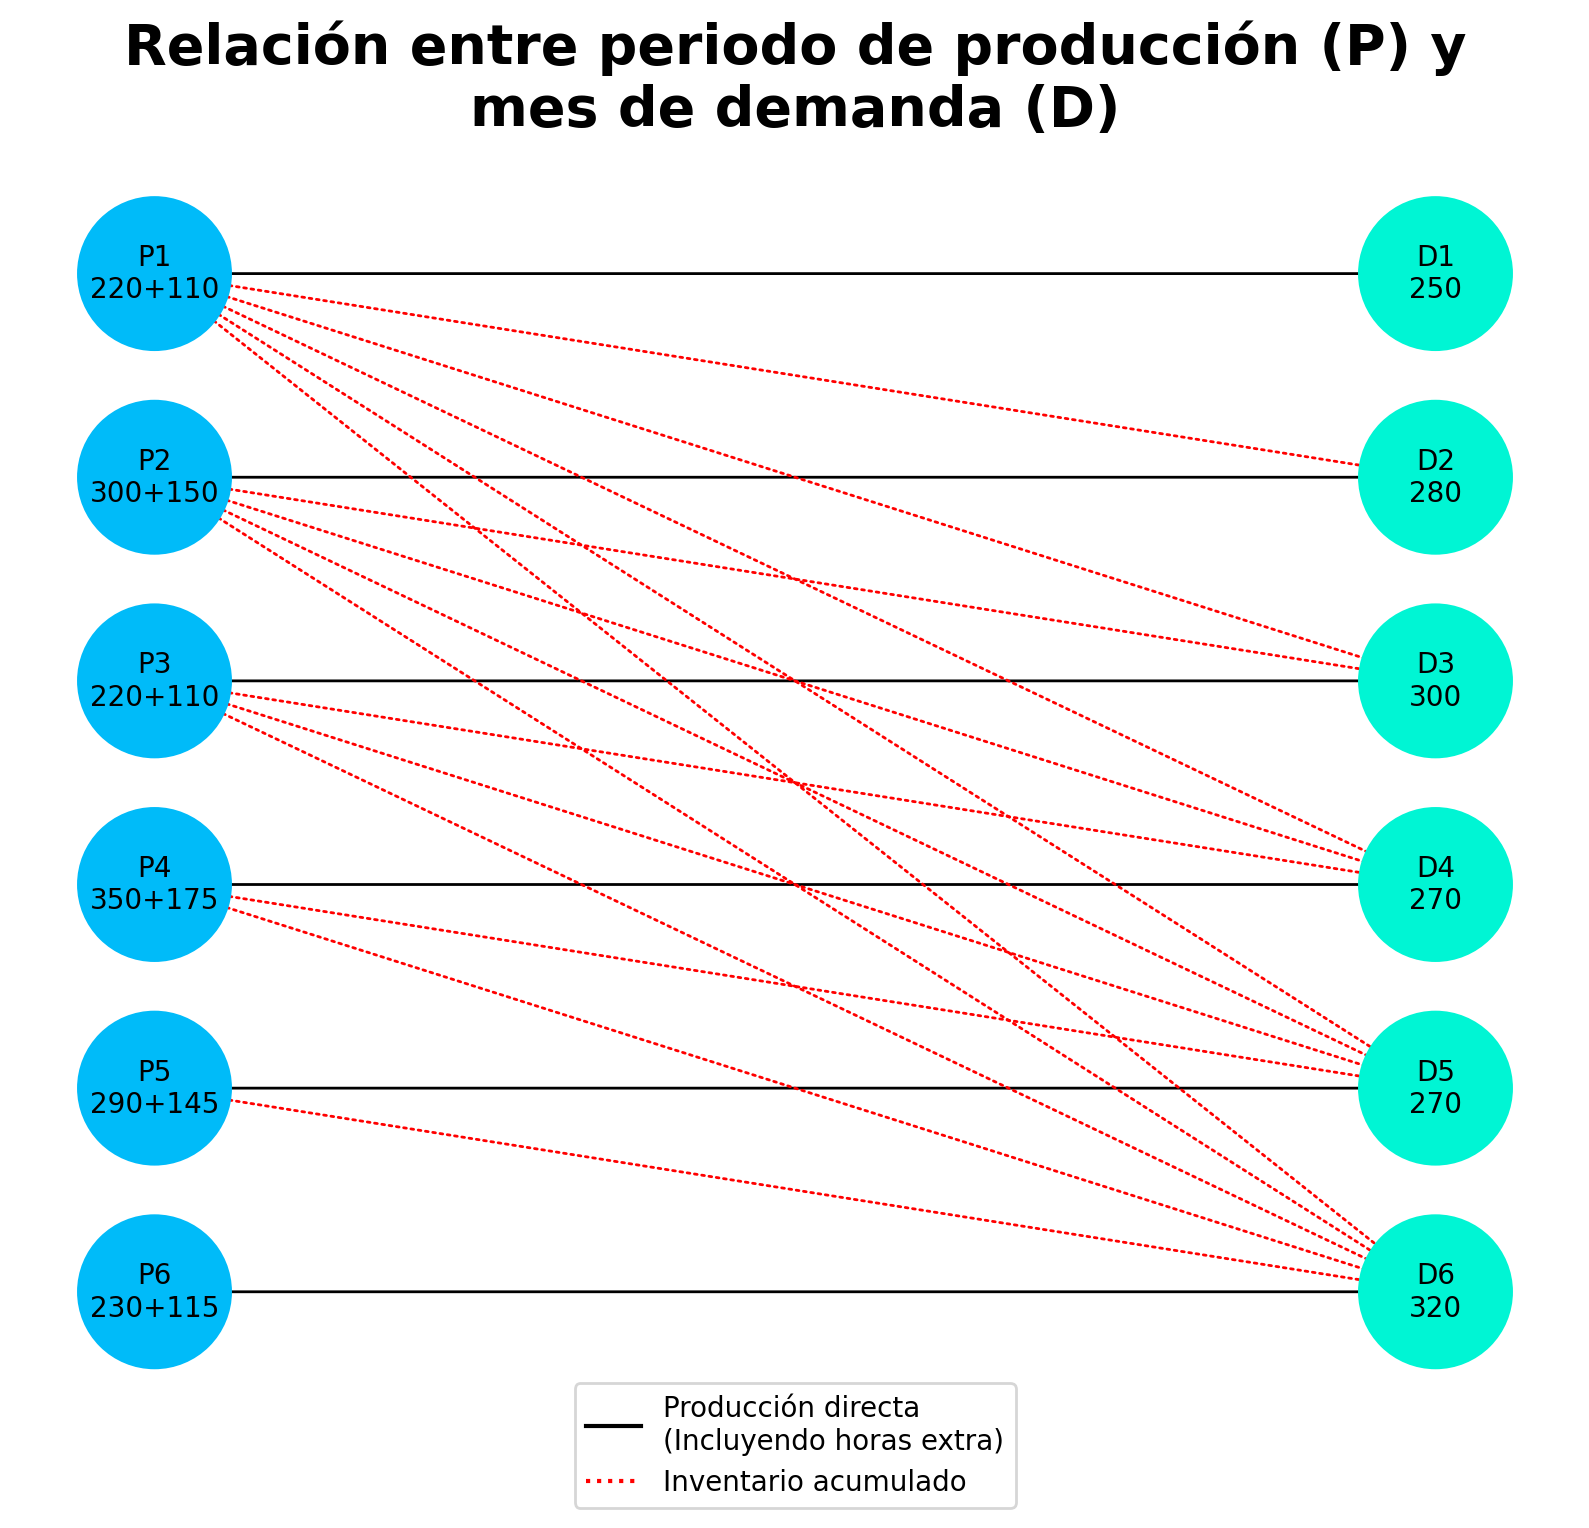

In [ ]:
# Crear el grafo
G_simple = nx.DiGraph()

# Nodos de producción (con capacidad máxima)
production_nodes = {
    "P1": "220+110",
    "P2": "300+150",
    "P3": "220+110",
    "P4": "350+175",
    "P5": "290+145",
    "P6": "230+115",
}

# Nodos de demanda (con demanda mensual)
demand_nodes = {
    "D1": "250",
    "D2": "280",
    "D3": "300",
    "D4": "270",
    "D5": "270",
    "D6": "320",
}

# Agregar nodos de producción y demanda al grafo
for node, label in production_nodes.items():
    G_simple.add_node(node, label=label, color="#00bbf9")

for node, label in demand_nodes.items():
    G_simple.add_node(node, label=label, color="#00f5d4")

# Agregar aristas (producción -> demanda directa)
for i in range(1, 7):
    G_simple.add_edge(f"P{i}", f"D{i}", label="Producción directa")

# Agregar aristas de inventario acumulado (producción -> demanda futura)
for i in range(1, 7):
    for j in range(i + 1, 7):  # Solo hacia demandas futuras
        G_simple.add_edge(f"P{i}", f"D{j}", label="Inventario acumulado")

# Obtener posiciones para los nodos
pos_simple = {
    **{f"P{i}": (0, 6 - i) for i in range(1, 7)},  # Producción
    **{f"D{i}": (1, 6 - i) for i in range(1, 7)},  # Demanda
}

# Dibujar los nodos
node_colors = [G_simple.nodes[node].get("color", "gray") for node in G_simple.nodes()]
plt.figure(figsize=(10, 8), dpi=200)
nx.draw_networkx_nodes(G_simple, pos_simple, node_color=node_colors, node_size=3000)
nx.draw_networkx_labels(
    G_simple,
    pos_simple,
    {node: f"{node}\n{data['label']}" for node, data in G_simple.nodes(data=True)},
    font_size=10,
)

# Dibujar las aristas de producción directa (normales)
prod_edges = [
    (u, v)
    for u, v, d in G_simple.edges(data=True)
    if d["label"] == "Producción directa"
]
nx.draw_networkx_edges(
    G_simple,
    pos_simple,
    edgelist=prod_edges,
    edge_color="black",
    arrowstyle="->",
    arrowsize=20,
)

# Dibujar las aristas de inventario acumulado (rojas y punteadas)
inv_edges = [
    (u, v)
    for u, v, d in G_simple.edges(data=True)
    if d["label"] == "Inventario acumulado"
]
nx.draw_networkx_edges(
    G_simple,
    pos_simple,
    edgelist=inv_edges,
    edge_color="red",
    style="dotted",
    arrowstyle="->",
    arrowsize=20,
)

# Crear líneas de la leyenda
line_black = mlines.Line2D(
    [],
    [],
    color="black",
    linestyle="-",
    label="Producción directa\n(Incluyendo horas extra)",
)
line_red_dotted = mlines.Line2D(
    [], [], color="red", linestyle=":", label="Inventario acumulado"
)

# Mostrar la leyenda
plt.legend(
    handles=[line_black, line_red_dotted],
    loc="lower center",
    bbox_to_anchor=(0.5, -0.1),
    fontsize=10,
    ncol=1,
)

# Mostrar el grafo
plt.title(
    "Relación entre periodo de producción (P) y\nmes de demanda (D)",
    fontdict={"size": 20, "weight": "bold"},
    y=1.02,
)
plt.axis("off")
plt.show()


### Tabla de costos del problema
La tabla de costos muestra el costo unitario para cada periodo haciendo distinción entre los costos unitarios para la producción dentro del tiempo normal, así como para la producción obtenida en tiempos extra. 

Las celdas que contienen ceros representan intersecciones que no aplican, por ejemplo, no hay costos unitarios asociados al periodo de producción 2, 3, 4, 5 y 6 en el mes 1 ni dentro del tiempo normal ni dentro del tiempo extra ya que solo puede haber producción para el periodo 1 dentro del primer mes.

Además, se tienen en cuenta los costos de inventario, ya que, por ejemplo, el precio unitario de lo producido en tiempo normal dentro del periodo 1, tiene un costo de 105 dentro del primer mes, pero cualquier unidad de este periodo usada en el mes 2, tiene un costo extra de 5, lo que refleja el costo de almacenarla en inventario. 

In [ ]:
# Crear el DataFrame basado en la imagen proporcionada
data = {
    "M1": [105, 147, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "M2": [110, 152, 113, 158.2, 0, 0, 0, 0, 0, 0, 0, 0],
    "M3": [115, 157, 118, 163.2, 99, 138.6, 0, 0, 0, 0, 0, 0],
    "M4": [120, 162, 123, 168.2, 104, 143.6, 126, 176.4, 0, 0, 0, 0],
    "M5": [125, 167, 128, 173.2, 109, 148.6, 131, 181.4, 119, 166.6, 0, 0],
    "M6": [130, 172, 133, 178.2, 114, 153.6, 136, 186.4, 124, 171.6, 93, 130.2]
}

index = [
    "P1", "Px1", "P2", "Px2", "P3", "Px3",
    "P4", "Px4", "P5", "Px5", "P6", "Px6"
]

df = pd.DataFrame(data, index=index)

print("Tabla de costos")
df


Tabla de costos


,M1,M2,M3,M4,M5,M6
P1,105,110.0,115.0,120.0,125.0,130.0
Px1,147,152.0,157.0,162.0,167.0,172.0
P2,0,113.0,118.0,123.0,128.0,133.0
Px2,0,158.2,163.2,168.2,173.2,178.2
P3,0,0.0,99.0,104.0,109.0,114.0
Px3,0,0.0,138.6,143.6,148.6,153.6
P4,0,0.0,0.0,126.0,131.0,136.0
Px4,0,0.0,0.0,176.4,181.4,186.4
P5,0,0.0,0.0,0.0,119.0,124.0
Px5,0,0.0,0.0,0.0,166.6,171.6


# Programación lineal del problema (Planteamiento)

### Definición de las 12 restricciones de capacidad para cada periodo
Definimos

$$ P_{ij}: \text{Producción en horas normales} $$

$$ Px_{ij}: \text{Producción en horas extras} $$

Donde 

$ \text{Periodo: } i = 1, 2,…, 6$

$\text{Mes: } j = 1, 2,…, 6 $


$$\text{PERIODO 1}$$
$$P_{11}+P_{12}+P_{13}+P_{14}+P_{15}+P_{16}\le220$$
$${Px}_{11}+{Px}_{12}+Px_{13}+Px_{14}+Px_{15}+Px_{16}\le110$$

$$\text{PERIODO 2}$$
$$P_{22}+P_{23}+P_{24}+P_{25}+P_{26}\le300$$
$$Px_{22}+Px_{23}+Px_{24}+Px_{25}+Px_{26}\le150$$

$$\text{PERIODO 3}$$
$$P_{33}+P_{34}+P_{35}+P_{36}\le220$$
$$Px_{33}+Px_{34}+Px_{35}+Px_{36}\le110$$

$$\text{PERIODO 4}$$
$$P_{44}+P_{45}+P_{46}\le350$$
$$Px_{44}+Px_{45}+Px_{46}\le175$$

$$\text{PERIODO 5}$$
$$P_{55}+P_{56}\le290$$
$$Px_{55}+Px_{56}\ \le145$$

$$\text{PERIODO 6}$$
$$P_{66}\le230$$
$$Px_{66}\le115$$


### Definición de las 6 restricciones de demanda para cada mes

$$\text{MES 1}$$
$$P_{11}+Px_{11}\geq250$$
$$\text{MES 2}$$
$$P_{12}+Px_{12}+P_{22}+Px_{22}\geq280$$
$$\text{MES 3}$$
$$P_{13}+Px_{13}+P_{23}+Px_{23}+P_{33}+Px_{33}\geq300$$
$$\text{MES 4}$$
$$P_{14}+Px_{14}+P_{24}+Px_{24}+P_{34}+Px_{34}+P_{44}+Px_{44}\geq270$$
$$\text{MES 5}$$
$$P_{15}+Px_{15}+P_{25}+Px_{25}+P_{35}+Px_{35}+P_{45}+Px_{45}+P_{55}+Px_{55}\geq270$$
$$\text{MES 6}$$
$$P_{16}+Px_{16}+P_{26}+Px_{26}+P_{36}+Px_{36}+P_{46}+Px_{46}+P_{56}+Px_{56}+P_{66}+Px_{66}\geq320$$


### Definición de la función objetivo para minimizar los costos
**Función de costo**
$$Z=105P_{11}+110P_{12}+115P_{13}+120P_{14}+125P_{15}+130P_{16}+$$
$$147Px_{11}+152Px_{12}+157Px_{13}+162Px_{14}+167Px_{15}+172Px_{16}+$$
$$113P_{22}+118P_{23}+123P_{24}+128P_{25}+133P_{26}+$$
$$158.2Px_{22}+163.2Px_{23}+168.2Px_{24}+173.2Px_{25}+178.2Px_{26}+$$
$$99P_{33}+104P_{34}+109P_{35}+114P_{36}+$$
$$138.6Px_{33}+143.6Px_{34}+148.6Px_{35}+153.6Px_{36}+$$
$$126P_{44}+131P_{45}+136P_{46}+$$
$$176.4Px_{44}+181.4Px_{45}+186.4Px_{46}+$$
$$119P_{55}+124P_{56}+$$
$$166.6Px_{55}+171.6Px_{56}+$$
$$93P_{66}+$$
$$130.2Px_{66}$$

El problema se compone de una fución objetivo que se compone de las 42 variables que representan cada una de las posibilidades de producción, es decir, cada variable representa una cantidad producida en un periodo $i$ para safisfacer la demanda de un mes $j$ y se distingue entre producción dentro de una jornada normal $(P)$ y producción dentro de las horas extra de una jornada $(Px)$.

La función objetivo es la función de costos $Z$ y esta se compone de la suma de cada unidad producida multiplicada por el costo unitartio asociado a dicha unidad. Los costos unitarios reflejan también el costo de almacenamiento en inventarios por mes. 

En cuanto a las restricciones, el problema tiene 18 restricciones en total, las cuales se pueden dividir en dos subconjuntos: restricciones de capacidad productiva (RCP) y restricciones de demanda (RD), las cuales contienen 12 y 6 restricciones respectivamente.

Las RCP reflejan el total de unidades que pueden ser producidas en cada periodo, tanto en horas normales como en horas extras. Estas restricciones están construídas de tal manera que reflejan la posibilidad de mantener en inventario y usarla para satisfacer la demanda de un mes posterior al periodo en el que fue producida. Un ejemplo de esto es la restricción del periodo 2 dentro de horas extra, la cual muestra que una unidad producida en este periodo puede usarse para satisfacer la demanda de cualquiera de los meses posteriores, 3, 4, 5 y 6, pero al mismo tiempo refleja una de las reglas planteadas por el problema, en la cual, no se puede usar la producción de un periodo $n$ para satisfacer la demanda de un mes $n-1$. Debido a que la capacidad productiva de cada periodo está definida con un tope máximo, las ecuaciones establecen una relación del tipo $\leq$ ya que es posible producir una cantidad igual o menor al tope máximo de capacidad de ese periodo, pero no es posible producir una cantidad de unidades por encima de este tope.

Por su parte, las RD reflejan la cantidad de unidades requeridas para cada mes. En este caso, a diferencia de las RCP la relación que se establece en las ecuaciones con las que se modelan es del tipo $\geq$, esto debido a que la cantidad que se demanda representa un tope mínimo, es decir, se espera que se entregue una cantidad igual a las unidades definidas en este tope mínimo. Si se presentaran menos, la demanda no quedaría satisfecha y eso sería un problema, pero si se presentan más no habrá problema, así que esta relación de desigualdad es adecuada para estos casos. Además estas ecuaciones reflejan el hecho de que para satisfacer las unidades de demanda de un mes n, se pueden usar unidades producidas en un mes $n, \ n-1,...,1$, es decir, se puede usar producción de un periodo pasado para satisfacer demanda del mes actual o meses posteriores.

# Solución del problema

In [ ]:
# Se crea una instancia de LpProblem y se le pasa el nombre
# del problema y el tipo, en este caso, de minimización.
problema = LpProblem("Minimización_de_costos", LpMinimize)

# Se definen las variables

# Primer periodo
p11 = LpVariable("P11", lowBound=0, cat="Integer")
p12 = LpVariable("P12", lowBound=0, cat="Integer")
p13 = LpVariable("P13", lowBound=0, cat="Integer")
p14 = LpVariable("P14", lowBound=0, cat="Integer")
p15 = LpVariable("P15", lowBound=0, cat="Integer")
p16 = LpVariable("P16", lowBound=0, cat="Integer")
px11 = LpVariable("Px11", lowBound=0, cat="Integer")
px12 = LpVariable("Px12", lowBound=0, cat="Integer")
px13 = LpVariable("Px13", lowBound=0, cat="Integer")
px14 = LpVariable("Px14", lowBound=0, cat="Integer")
px15 = LpVariable("Px15", lowBound=0, cat="Integer")
px16 = LpVariable("Px16", lowBound=0, cat="Integer")

# Segundo periodo
p22 = LpVariable("P22", lowBound=0, cat="Integer")
p23 = LpVariable("P23", lowBound=0, cat="Integer")
p24 = LpVariable("P24", lowBound=0, cat="Integer")
p25 = LpVariable("P25", lowBound=0, cat="Integer")
p26 = LpVariable("P26", lowBound=0, cat="Integer")
px22 = LpVariable("Px22", lowBound=0, cat="Integer")
px23 = LpVariable("Px23", lowBound=0, cat="Integer")
px24 = LpVariable("Px24", lowBound=0, cat="Integer")
px25 = LpVariable("Px25", lowBound=0, cat="Integer")
px26 = LpVariable("Px26", lowBound=0, cat="Integer")

# Tercer periodo
p33 = LpVariable("P33", lowBound=0, cat="Integer")
p34 = LpVariable("P34", lowBound=0, cat="Integer")
p35 = LpVariable("P35", lowBound=0, cat="Integer")
p36 = LpVariable("P36", lowBound=0, cat="Integer")
px33 = LpVariable("Px33", lowBound=0, cat="Integer")
px34 = LpVariable("Px34", lowBound=0, cat="Integer")
px35 = LpVariable("Px35", lowBound=0, cat="Integer")
px36 = LpVariable("Px36", lowBound=0, cat="Integer")

# Cuarto periodo
p44 = LpVariable("P44", lowBound=0, cat="Integer")
p45 = LpVariable("P45", lowBound=0, cat="Integer")
p46 = LpVariable("P46", lowBound=0, cat="Integer")
px44 = LpVariable("Px44", lowBound=0, cat="Integer")
px45 = LpVariable("Px45", lowBound=0, cat="Integer")
px46 = LpVariable("Px46", lowBound=0, cat="Integer")

# Quinto periodo
p55 = LpVariable("P55", lowBound=0, cat="Integer")
p56 = LpVariable("P56", lowBound=0, cat="Integer")
px55 = LpVariable("Px55", lowBound=0, cat="Integer")
px56 = LpVariable("Px56", lowBound=0, cat="Integer")

# Sexto periodo
p66 = LpVariable("P66", lowBound=0, cat="Integer")
px66 = LpVariable("Px66", lowBound=0, cat="Integer")


In [2]:
# Se define la función objetivo
z = (
    105 * p11 + 110 * p12 + 115 * p13 + 120 * p14 + 125 * p15 + 130 * p16 +
    147 * px11 + 152 * px12 + 157 * px13 + 162 * px14 + 167 * px15 + 172 * px16 +
    113 * p22 + 118 * p23 + 123 * p24 + 128 * p25 + 133 * p26 +
    158.2 * px22 + 163.2 * px23 + 168.2 * px24 + 173.2 * px25 + 178.2 * px26 +
    99 * p33 + 104 * p34 + 109 * p35 + 114 * p36 +
    138.6 * px33 + 143.6 * px34 + 148.6 * px35 + 153.6 * px36 +
    126 * p44 + 131 * p45 + 136 * p46 +
    176.4 * px44 + 181.4 * px45 + 186.4 * px46 +
    119 * p55 + 124 * p56 +
    166.6 * px55 + 171.6 * px56 +
    93 * p66 + 130.2 * px66
)

# Se agrega la función objetivo al problema
problema += z

In [3]:
# Se definene las restricciones del problema

# Se agregan las restricciones al problema
# Restricciones de capacidad
problema += p11 + p12 + p13 + p14 + p15 + p16 <= 220, "Restriccion_Capacidad_1"
problema += px11 + px12 + px13 + px14 + px15 + px16 <= 110, "Restriccion_Capacidad_2"
problema += p22 + p23 + p24 + p25 + p26 <= 300, "Restriccion_Capacidad_3"
problema += px22 + px23 + px24 + px25 + px26 <= 150, "Restriccion_Capacidad_4"
problema += p33 + p34 + p35 + p36 <= 220, "Restriccion_Capacidad_5"
problema += px33 + px34 + px35 + px36 <= 110, "Restriccion_Capacidad_6"
problema += p44 + p45 + p46 <= 350, "Restriccion_Capacidad_7"
problema += px44 + px45 + px46 <= 175, "Restriccion_Capacidad_8"
problema += p55 + p56 <= 290, "Restriccion_Capacidad_9"
problema += px55 + px56 <= 145, "Restriccion_Capacidad_10"
problema += p66 <= 230, "Restriccion_Capacidad_11"
problema += px66 <= 115, "Restriccion_Capacidad_12"

# Restricciones de demanda
problema += p11 + px11 >= 250, "Restriccion_Demanda_1"
problema += p12 + px12 + p22 + px22 >= 280, "Restriccion_Demanda_2"
problema += p13 + px13 + p23 + px23 + p33 + px33 >= 300, "Restriccion_Demanda_3"
problema += p14 + px14 + p24 + px24 + p34 + px34 + p44 + px44 >= 270, "Restriccion_Demanda_4"
problema += (
    p15 + px15 + p25 + px25 + p35 + px35 + p45 + px45 + p55 + px55 >= 270,
    "Restriccion_Demanda_5"
)
problema += (
    p16 + px16 + p26 + px26 + p36 + px36 + p46 + px46 + p56 + px56 + p66 + px66 >= 320,
    "Restriccion_Demanda_6"
)


In [4]:
# Se resuelve el problema
problema.solve(COIN_CMD(msg=False))

1

In [16]:
print(f"La solución optima es: {problema.objective.value()}")
print(f"Es decir, el costo mínimo haciendo elecciones óptimas es de: ${problema.objective.value()}")

La solución optima es: 190740.0
Es decir, el costo mínimo haciendo elecciones óptimas es de: $190740.0


In [8]:
print("Los valores de las variables distintas a cero que minimizan los costos son: ")
for variable in problema.variables():
    if variable.value() != 0:
        print(f"{variable.name}: {int(variable.varValue)}")

Los valores de las variables distintas a cero que minimizan los costos son: 
P11: 220
P22: 280
P23: 20
P33: 220
P44: 270
P55: 270
P56: 20
P66: 230
Px11: 30
Px33: 60
Px66: 70


# Conclusiones
Este ejercicio deja en claro la importancia y utilidad que la investigación de operaciones tiene para resolver ciertos problemas de optimización.

Los resultados obtenidos se interpretan de la siguiente manera.

Periodo 1: 220 unidades normales y 30 en tiempo extra

Periodo 2: 300 unidades normales y 0 en tiempo extra, guardando 20 para usarlas en el mes 3

Periodo 3: 220 unidades normales y 60 en tiempo extra y usar las 20 producidas en el el periodo 2

Periodo 4: 270 unidades normales y 0 en tiempo extra

Periodo 5: 290 unidades normales y 0 en tiempo extra, guardando 20 unidades para usarlas en el mes 6

Periodo 6: 230 unidades normales y 70 en tiempo extra y usar las 20 producidas en el el periodo 5

El resto de las variables tuvieron un valor de cero, esto significa que para alcanzar un costo mínimo, se debe de producir cero unidades de cada una de estas variables.

Mediante este esquema de producción, el costo se minimiza quedando en un total de: **$190,740.0**

En este caso específico, el uso de la técnica de programación líneal demostró ser una poderosa herramienta de optimización. El problema en cuestión, contiene una cantidad significativa de variables y restricciones, es decir, distintas condiciones que sobre las que se puede elegir y cada variación significa una variación en los costos.

A través de la programación lineal, se puede elegir la combinación óptima de factores que llevan a un costo mínimo. Por ejemplo, se evidenció que en los periodos 2 y 5, el almacenamiento de 20 unidades permitió reducir la dependencia del tiempo extra en los meses 3 y 6, respectivamente. Este enfoque no solo asegura el cumplimiento de la demanda, sino que optimiza el uso de los recursos disponibles, evidenciando la versatilidad y el impacto positivo de la programación lineal en la toma de decisiones operativas.

# Bibliografía
Dominguéz, É., & Romero, D. (2018). matem.unam. Obtenido de https://www.matem.unam.mx/investigacion/fordecyt/talleric2018/un-acercamiento-a-la-teoria-de-grafos-y-matrices-de-robinson

Sandblom, C., & Eiselt, H. (2012). Operations Research A Model-Based Approach. Londres: Springer.

Taha, H. A. (2012). Investigación de operaciones. Naucalpan de Juárez: Pearson.

